<a href="https://colab.research.google.com/github/raykil/PY580-Machine-Learning/blob/main/NB3_CVI_linreg_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 3: Linear Regression (Diabetes)

## Learning Goal  
The goal of this notebook is to get hands-on experience and intuition about linear regression and regularization. We once again emphasize the difference between fitting and predicting. We will see that it is much more difficult to get good out-of-sample performance on a test set (predicting) than it is to get good in-sample performance on the training set (fitting).

## Overview:

In Notebook 1: __Section II: Machine Learning is difficult__, we explored linear regression in the context of a prediction problem. In this notebook, we'll formally introduce the notion of regression and see how learning and prediction can be improved by introducing regularization. We will focus mainly on simple applications of linear regression: minimizing the mean-square-error (MSE) on the training data (i.e. in-sample error) and see how well we perform on the test data (i.e. out-of-sample error). 


As we discussed in Sec. II of the review, there is a fundamental difference between minimizing the in-sample error and minimizing the out-of-sample error. The underlying reason for this is that the training data may not be representative of the full data distribution. From a Bayesian point of view, as [David MacKay](http://www.inference.org.uk/mackay/) likes to repeat: <i>We can't make predictions without making assumptions.</i> Thus, it is sensible to introduce priors that reflect the fact that we are likely to be undersampled (especially in high dimensions).

We'll consider ordinary least squares regression problem in which the "error function" is defined as the square from the deviation of our linear predictor to the true response. We will supplement this error function with a regularizer that prevents overfitting. From a Bayesian point of view, the regularization can be thought of as a prior on parameters, see Sec VI.
Minimizing the combined in-sample error + regularization terms is the same as the <b> Maximum a posteriori probability (MAP)</b> estimate in Bayesian regression (the parameters at which the posterior probability distribution is peaked). Note that in a true Bayesian approach, we should not use the mode of the posterior but the average over all possible choices of parameters weighted by their posterior probability. In practice, this is  often not done (for computational and practical reasons).



## Least squares linear regression: 

Consider data of the form $(y_i,\mathbf{x}^{(i)})$ where the index $i=1\ldots n$ runs over the number of examples in the training data and $\mathbf{x}^{(i)}$ is a $p$-dimensional feature (row) vector. For notational convenience, it is useful to define the $n \times p$ <b>design matrix</b> $X$ whose rows, $\textbf{x}^{(1)},\cdots, \textbf{x}^{(n)}$, are the examples and columns, $\mathbf{X}_{:,1},\cdots, \mathbf{X}_{:,p}$,  are the measured "features" (i.e. feature predictors). We also denote the $n$-dimensional column vector of sample $i$ as $\mathbf{y}_i$ and the $p$-dimensional column vector of regression parameters $\mathbf{w}\in\mathbb{R}^p$.

For ordinary least square regression (no regularization), we minimize the square loss cost function:

$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\textbf{Xw}-\textbf{y}||_2^2 = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} \,(\mathbf{Xw}-\mathbf{y})^T(\mathbf{Xw}-\mathbf{y}),
$$

or equivalently, in component form,
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}}   \sum_{i=1}^n (y_i -\mathbf{w}\cdot\mathbf{x}^{(i)})^2.
$$

If rank$(\mathbf{X})=p$, namely, the feature predictors $\mathbf{X}_{:,1},\cdots \mathbf{X}_{:,p}$ are linearly independent, then there exists unique solution to this problem:

$$
\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}
$$

### Exercise 1: ###  
<ul>


<li> This choice of parameters correspond the maximum likehood estimate of which Likelihood function? 
<br>
<font color=#2E86C1>
The parameters are chosen so that the mean square error is minimized. This comes from maximizing the following likelihood function:
\begin{eqnarray}
  L(f,\mathbf{x},\mathbf{y}) - \prod_{i=1}^n\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y_i-f(x_i))^2}{2\sigma^2}} = n\log\frac{1}{\sigma\sqrt{2\pi}}-\sum_{i=1}^n\frac{1}{2\sigma^2}(y_i-f(x_i))^2
\end{eqnarray}
</font>
<br><br>

<li> Derive $\hat{\textbf{w}}$ explicitly by solving the least square problem defined above.
<br>
<font color=#2E86C1>
Minimizing the $L_2$ norm amounts to finding the place where the gradient of the norm is 0 with respect to the parameters.
\begin{eqnarray}
∇_{\omega}(y-\hat{y})^2 &=& ∇_{\omega}\left[(y-W\omega)^T(y-W\omega)\right] \\\nonumber &=& ∇_{\omega}\left[y^Ty-2\omega^TX^Ty+\omega^TX^TX\omega\right] = -2X^Ty+2X^TX\omega = 0 \\\nonumber
&\Rightarrow& \omega = (X^TX)^{-1}X^Ty
\end{eqnarray}
</font><br>

<li> Is $\hat{\textbf{w}}$ a biased or an unbiased estimator? In other words, does it give the correct answer as the number of data points goes to infinity ($n \rightarrow \infty$). To answer this question, you may assume i.i.d. (independent, identically distributed) samples $(y_i,\textbf{x}^{(i)})$.
<br>
<font color=#2E86C1>
I remember that the bias comes from finiteness of data. If we have access to infinite data, i.e., the true population, the least squares regression will return the true parameters. Thus, $\hat{\textbf{w}}$ is an unbiased estimator.

</font><br>

<li> Is $\hat{\textbf{w}}$ still well-defined when rank$(\mathbf{X})<p$? This happens when, for example, $n<p$. 
<br>
<font color=#2E86C1>
When rank$(\mathbf{X})<p$, $X^TX$ is singular, and there exists infinitely many solutions for the least squares problem.
</font><br><br>

<li> Now imagine the samples are generated in the following manner: $y_i=\textbf{w}_\text{true}\cdot \textbf{x}^{(i)}+\epsilon_i$ where $\epsilon_i\sim\mathcal{N}(0,\sigma^2)$ are i.i.d. Gaussian errors. In statistics, the in-sample risk is defined as $$R(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],$$
where $\mathbb{E}[\cdots]$ is taken over all i.i.d pairs $(y_i,\textbf{x}^{(i)})$ and $\hat{\textbf{w}}$ is the least squares solution given above. Assuming that $\mathbf{X}$ and $\epsilon_i$ are independent, show that the risk is given by$$R(\hat{\textbf{w}}, \textbf{w}_\text{true}) = \sigma^2\frac{p}{n}$$What's the implication of this for fixed $p$ as $n \rightarrow \infty$? How about when $p,n$ scale together?
<br>
<font color=#2E86C1>
As $n\rightarrow\infty$ with fixed $p$, risk reduces to 0. This means that the in sample error $\bar{E}_{in}$ is similar to $\bar{E}_{out}$. When $p$ and $n$ scale together, the risk is dominantly affected by $\sigma^2$. This means that the model might not be learning.
</ul>




From Exercise 1, it is clear that the uniqueness of the solution is only guaranteed when rank$(\mathbf{X})>p$. But even so we still may not want to use least squares if $p$ is moderately close to $n$, because its "risk" could be quite poor. One way to deal with this is to  <i> regularize</i>.

We will be concerned with two classes of regularizers: <b> L2-regularization</b> which is often called <b> Ridge-Regression</b> (or <b>Tikhonov regression</b>) and <b> L1-regularization</b> which goes under the name <b>LASSO</b> (and is closely related to <b>Compressed Sensing</b>).


## Ridge Regression
In Ridge-Regression, the regularization penalty is taken to be the L2-norm of the parameters
$$
E_{ridge}= \lambda ||\textbf{w}||_2^2 = \lambda \textbf{w}^T \textbf{w}=\lambda \sum_{\gamma=1}^p w_\gamma w_\gamma.
$$

Thus, the model is fit by minimizing the sum of the in-sample error and the regularization term
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||\mathbf{X}\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2.
$$
Notice that the parameter $\lambda$ controls how much we weigh the fit and regularization term.

### Exercise 2: ###  
<ul>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?
<br><font color=#2E86C1>
Let's remember that MAP estimate is formalized as
$$\hat{\theta} = \text{arg max}_{\theta}\log P(y|\theta)+\log P(\theta),$$
where the first term is the likelihood function and the second term is a prior. When we take the prior to be a Gaussian distribution, above expression becomes
\begin{eqnarray}
\hat{\mathbf{\theta}}_{Ridge}(\lambda) &=& \text{arg max}\left[\mathcal{L}+\log\prod_{j}\sqrt{\frac{\lambda}{2\pi}}e^{-\lambda\theta_j^2}\right] \\
&=&
\text{arg max}\left[-\mathcal{L}-\sum_{j}\lambda\theta_j^2\right] \\
&=&
\text{arg min}\left[\mathcal{L}+\lambda\sum_{j}\theta_j^2\right].
\end{eqnarray}
We can see that the minimization of $L_2$ norm that Ridge exploits naturally follows from taking Gaussian distribution as a prior.
Prior to Ridge regression is a Gaussian distribution. 
</font><br><br>
<li>Show that the solution to Ridge regression is given by $\mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}$. 
<br>
<font color=#2E86C1>
Quantity we want to minimize is now
\begin{eqnarray}
\mathbf{w}_{ridge} &=& ||\mathbf{X}\mathbf{w}-\mathbf{y}||_2^2+\lambda||\mathbf{w}||_2^2 \\&=& \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - 2\mathbf{w}^T\mathbf{X}^T\mathbf{y}+\mathbf{y}^T\mathbf{y}+\lambda\mathbf{w}^T\mathbf{w}
\end{eqnarray}
Take the gradient and set it equal to 0.
\begin{eqnarray}
\nabla_{\mathbf{w}}&&\left[\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - 2\mathbf{w}^T\mathbf{X}^T\mathbf{y}+\mathbf{y}^T\mathbf{y}+\lambda\mathbf{w}^T\mathbf{w}\right] = -2\mathbf{X}^T\mathbf{y}+2\mathbf{X}^T\mathbf{X}\mathbf{w}+2\lambda\mathbf{w} = 0 \\
&&\Rightarrow
(\mathbf{X}^T\mathbf{X}+\lambda \mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{y}\\
&&\Rightarrow
\mathbf{w}_{ridge} = (X^TX+\lambda I)^{-1}\mathbf{X}^T\mathbf{y}
\end{eqnarray}
</font>

<li>Express your answer in terms of the Singular Value Decomposition of $\mathbf{X}$.
<br>
<font color=#2E86C1>
Noting that $\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V}^T$, where $\mathbf{U}$ is a unitary spanning the column space of $\mathbf{X}$, $\mathbf{D}$ is a rectangular diagonal matrix, and $\mathbf{V}^T$ is another unitary spanning the row space of $\mathbf{X}$, above expression is given by:
\begin{eqnarray}
\mathbf{X}\mathbf{w}_{ridge} &=& \mathbf{U}\mathbf{D}\mathbf{V}^T(\mathbf{V}\mathbf{D}^T\mathbf{U}^T\mathbf{U}\mathbf{D}\mathbf{V}^T+\lambda \mathbf{I})^{-1}\mathbf{V}\mathbf{D}^T\mathbf{U}^T\mathbf{y}\\ &=& 
\mathbf{U}\mathbf{D}(D^2+\lambda\mathbf{I})^{-1}\mathbf{DU}^T\mathbf{y}
\end{eqnarray}
</font>
</ul>

## LASSO ##

We will also be interested in the case where the penalty is the L1-norm of the parameters (sum of absolute values of parameters). This is called LASSO.
$$
E_{LASSO}= \lambda ||\mathbf{w}||_1 = \lambda \sum_{\gamma=1}^p |w_\gamma| .
$$
In this case, 
$$
\textbf{w}_{LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} {1 \over 2n} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1.
$$
Note the prefactor $1/(2n)$ in the loss function is not essential to this formulation. We have chosen this form to be consistent with the Scikit-Learn package in Python. As we discussed in the main text, LASSO tends to give sparse solution. In the following we're going to explore these ideas a little bit more.


### Exercise 3: ###  
<ul>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?
<br>
<font color=#2E86C1>
Similar to above, if we take the Laplacian distribution as a prior, LASSO naturally follows.
\begin{eqnarray}
\hat{\mathbf{\theta}}_{LASSO}(\lambda) &=& \text{arg max}\left[\mathcal{L}+\log\prod_{j}\frac{\lambda}{2}e^{-\lambda|\theta_j|}\right] \\
&=&
\text{arg max}\left[-\mathcal{L}-\sum_{j}\lambda|\theta_j|\right] \\
&=&
\text{arg min}\left[\mathcal{L}+\lambda\sum_{j}|\theta_j|\right].
\end{eqnarray}
Thus, the prior for LASSO is a Laplacian distribution.
</font><br><br>
<li>In this case, can you derive an analytic expression for $\mathbf{w}_{LASSO}$? Do you have any ideas about how we might be able to efficiently numerically calculate this? 
<br>
<font color=#2E86C1>
Using subgradient optimality condition, the analytic expression for $\mathbf{w}_{LASSO}$ is given by
$$\hat{w}_j^{LASSO}(\lambda) = \text{sign}(\hat{w}_j^{LS})(|\hat{w}_j^{LS}|-\lambda)_{+},$$ where $(|\hat{w}_j^{LS}|-\lambda)_{+}$ denotes for the positive part of $|\hat{w}_j^{LS}|-\lambda$, and $\hat{w}_j^{LS}$ is the $j$th component of the least squares solution.
</font><br><br>
<li> Do you think LASSO and Ridge Regression will give qualitatively different answers? (Consider the limits $\lambda=0$ and $\lambda = \infty$)
<br>
<font color=#2E86C1>
When $\lambda = 0$, then there will be no regularization term. Thus, both Ridge and LASSO regression will reduce to the least squares regression. When $\lambda \rightarrow \infty$, the parameters in LASSO will be weighted as precisely 0, whereas the parameters in Ridge will asymptotically approach to 0.
</font>
</ul>

## Numerical Experiments with Ridge Regression and LASSO##

We will now perform some numerical experiments with the Diabetes Dataset trying to predict diabetes outcomes one year forward. More information about this data set can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes">https://archive.ics.uci.edu/ml/datasets/Diabetes</a>. This dataset was described in the famous <a href="http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf">Least Angle Regression</a> paper by Efron, Hastie, Johnstone, Tibshirani as follows:
<blockquote>Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n = 442$ diabetes patients, as well as the
response of interest, a quantitative measure of disease progression one year after baseline.</blockquote>


We start by plotting the weights for each value of $\lambda$ for Ridge Regression and LASSO. This is called a regularization path. We also compare the in-sample and out-of-sample performance between two regressions by examining the $R^2$ coefficient of determination (for detailed definition see <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">here</a>). In terms of linear regression, $R^2$ tells us how well the regression function fits the data. The best attainable fit corresponds to $R^2=1$.


Automatically created module for IPython interactive environment
350 92 len(X_train),len(X_test)


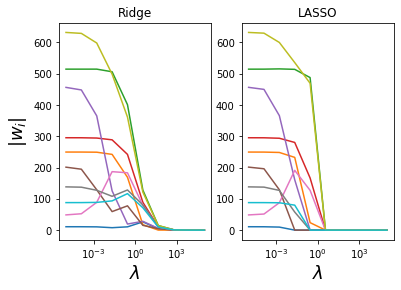

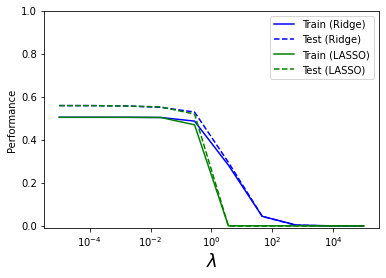

In [23]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=442
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-5, 5, 10)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples_train = 350
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
print(len(X_train),len(X_test),"len(X_train),len(X_test)")
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()





### Exercise 4: ###  
<ul>
<li>What do the points $\lambda=0$ and $\lambda=10^5$ correspond to? Is it strange that the weights are not monotonic in $\alpha$? Why do you think this might be?
<br>
<font color=#2E86C1>
I observe that the weights of some parameters increase in the region where the regularization parameter $\lambda$ is in between 0.01 and 1. This means that the models consider some parameters more important as $\lambda$ changes. For example, when one parameter is decreased, it may be possible that the optimal regression is obtained when other parameter is increased. Thus, I believe it is sensible to have non-monotonic weights in $\alpha$. $\lambda=0$ corresponds to OLS regression, because the regularization is "turned off". $\lambda=10^5$ corresponds to regularization dominating, in which case, both Ridge and LASSO will tend to suppress all parameters to 0 (difference is that Ridge will asymptotically suppress the parameters while LASSO will set it to 0 at some point in $\lambda$).
</font><br><br>
<li>Make a similar regularization plot for LASSO? 
<li> What is the qualitative difference between the LASSO path and Ridge Path? Does this agree with your earlier predictions? Can you make some qualitative argument to rationalize this difference?
<br>
<font color=#2E86C1>
Both Ridge and LASSO approach to 0 as $\lambda$ increases. However, Ridge asympotically approach 0, whereas LASSO abruptly drops features one by one to exactly 0. This means that LASSO does not consider the parameter that has been dropped to 0 when making predictions on diabetes.
</font><br><br>

<li>How do your answers change when you vary the number of examples and training set size?
<br>
<font color=#2E86C1>
I changed the number of examples to 442, i.e., the whole dataset, and set the training set size to 350. The test size naturally becomes 92. With this change, both LASSO and Ridge had higher test performance than the training performance, whereas with the default values, it was the opposite.
</font><br><br>
</ul>

## A brief note about convexity##

In Sec. VI of the review, we briefly discussed convexity. Here's a quick refresher: Recall that a set $C\subseteq\mathbb{R}^n$ is called <i> convex </i> if any $x,y\in C$ and $t\in [0,1]$, 
$$
tx+(1-t)x \in C.
$$
In other words, every line segments joining $x,y$ lies entirely in $C$. 

A function $f:\mathbb{R}^n\rightarrow \mathbb{R}$ is called <i> convex </i> if its domain dom$(f)$ is a convex set and for any $x,y\in$dom$(f)$ and $t\in [0,1]$, 

$$
f(tx+(1-t)y)\le tf(x)+(1-t)f(y).
$$
In other words, the function lies below the line segment joining $f(x)$ and $f(y)$. This function $f$ is called <b> strictly convex </b> if this inequality holds strictly for $x\neq y$ and $t\in(0,1)$. 

Why is convexity important?  <b> For convex functions, any local minimizer is a global minimizer</b>. Algorithmically, this means that in the minimization (optimization) procedure, as long as we're "going down the hill" and agree to stop when we can't go any further, then we've hit the global minimum. In addition to this, there's a menagerie of beautiful theory regarding convex duality and optimality, which gives us a way of understanding the solutions even before solving the problem itself. We refer interested readers to  <a href="http://web.stanford.edu/~boyd/cvxbook/">Boyd and Vandenberghe book on Convex Optimization</a>.


Coming back to our regularization examples, a simple inspection reveals that both LASSO and Ridge regression are convex in $w$. What's more, Ridge is actually a <i> strictly convex </i> problem (assuming $\lambda>0$) due to presence of L2 penality. In fact, this is always true regardless of $X$ and so the ridge regression solution you worked out (presumably) in Exercise 2 is always well-defined.

In contrast, LASSO is not always strictly convex and hence by convexity
theory, it need not have a unique solution. The LASSO solution is unique under general conditions, for example, when $X$ has columns in <i> general position </i> (see <a href="https://arxiv.org/abs/1206.0313"> Tibshirani 2013</a>). To mitigate this, one can define a modified problem called the <a href="https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf">elastic net</a> such that the function we want to minimize is always strictly convex:

$$
\underset{\mathbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1 + \delta||\mathbf{w}||_2^2,
$$
where $\lambda,\delta\ge 0$ are regularization parameters. Now aside from uniqueness of the solution, the elastic net combines some of the desirable properties (e.g. prediction) of ridge regression with the sparsity properties of the LASSO. In the following exercise, you're going to explore a little bit about elastic net.

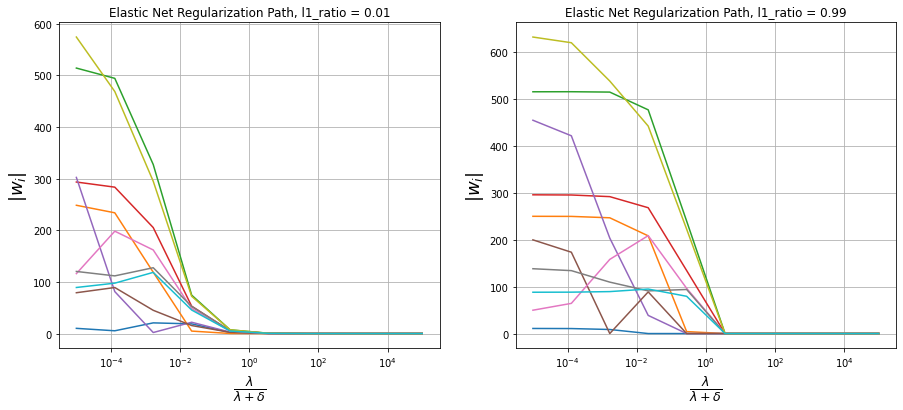

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# Loading data
number_examples=442
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Elastic net 
# l1_ratio runs in [0,1], with 0 being fully L2, and 1 being fully L1.
net_l2 = linear_model.ElasticNet(l1_ratio = 0.01)
net_l1 = linear_model.ElasticNet(l1_ratio = 0.99)
net_fixL = linear_model.ElasticNet(l1_ratio = 0.99)
net_fixD = linear_model.ElasticNet(l1_ratio = 0.99)

# Paths
alphas = np.logspace(-5, 5, 10)

# Samples again
n_samples_train = 350
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]

# Initializing coefficients
coefs_net_l2 = []
coefs_net_l1 = []
for a in alphas:
    # L2 heavy, almost Ridge
    net_l2.set_params(alpha=a)
    net_l2.fit(X_train, y_train)
    coefs_net_l2.append(net_l2.coef_)

    # L1 heavy, almost LASSO
    net_l1.set_params(alpha=a)
    net_l1.fit(X_train, y_train)
    coefs_net_l1.append(net_l1.coef_)

# Plotting regularization path
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_net_l2))
plt.xlabel(r'$\frac{\lambda}{\lambda+\delta}$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Elastic Net Regularization Path, l1_ratio = 0.01')
plt.grid()

plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_net_l1))
plt.xlabel(r'$\frac{\lambda}{\lambda+\delta}$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Elastic Net Regularization Path, l1_ratio = 0.99')
plt.grid()

### Exercise 4: ###  
<ul>
<li> Play with the parameters $\lambda$ and $\delta$, when would you expect sparse solutions?
<br>
<font color=#2E86C1>
Intuitively, elastic net is a combination of LASSO ($\lambda$ term) and Ridge ($\delta$ term). Since LASSO tends to return sparse solutions, we would expect sparse solutions when $\lambda$ is big and $\delta$ is small.
</font><br><br>
<li> Plot the regularization path of elastic net. How does it depend on $\lambda$ and $\delta$?
<br>
<font color=#2E86C1>
On the left plot, we see that the parameters are gradually tending to 0 just as what would happen for Ridge. The parameters eventually drop down to 0 due to the effect of LASSO. On the right, we observe more drastic drops to 0, as LASSO is dominant.
</font><br><br>
<li> Derive the analytic solution of this elastic net problem. Check your answer by looking at two limiting cases ($\lambda\rightarrow 0$ and $\delta\rightarrow 0$). Does this agree with what you found previously?
<br>
<font color=#2E86C1>
\begin{eqnarray}
\hat{\mathbf{w}}_{elastic}(\lambda, \delta) &=& \text{arg min}_{w}\left(|Xw-y|^2+\lambda|w|+\delta|w|^2\right)
\end{eqnarray}
Thus,
\begin{eqnarray}
\nabla_{w}\left[|Xw-y|^2+\lambda|w|+\delta|w|^2\right]&=&
\nabla_{w}\left[y^Ty-2w^TX^Ty+w^TX^TXw+\lambda w+\delta w^2\right] \\
&=&
-2X^Ty+2w^TX^Ty+w^TX^TXw+\lambda w + \delta w^2 = 0
\end{eqnarray}
Solving for $w$,
$$\hat{\mathbf{w}}_{elastic}(\lambda, \delta) = \left(X^TX+\delta I\right)^{-1}\left(X^Ty-\lambda\,\text{sign}(w)\right).$$
Limiting cases:
\begin{eqnarray}
\delta = 0 &\Rightarrow& w = (X^TX)^{-1}(X^Ty-\lambda\,\text{sign}(w)) = \text{sign}w\left[(X^TX)^{-1}X^Ty-\lambda\right] \\
\lambda = 0 &\Rightarrow& w = (X^TX+\delta I)^{-1}X^Ty
\end{eqnarray}
in which both cases are in agreement with LASSO and Ridge, respectively.
</font><br><br>

</ul>

### End-of-notebook questions ###  
<ul>

<li> Can you explain the difference between in-sample and out-of-sample performance? Is out-of-sample error usually larger than in-sample error? Does this depend on regularization? Recall in Exercise 1, we defined the in-sample risk as 

$$
R_{in}(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],
$$ 
where $\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}$ is the least square solution and $\textbf{w}_\text{true}$ is the true parameter vector used to generate all samples. Following the same notation and assumption, now imagine if we're given a new data point $\textbf{x}_0$ independently drawn from the predictor distribution $\mathcal{P}$. We can define the out-of-sample risk as 
$$
R_{out} =\mathbb{E}_{\textbf{x}^{(0)}\sim\mathcal{P}}\mathbb{E}_{(y_i,\textbf{x}_i)}[(\hat{\textbf{w}}\cdot \textbf{x}_0 -\textbf{w}_\text{true}\cdot \textbf{x}_0)^2],
$$
with the expectation value taken not only over the training samples $(y_i,\textbf{x}_i)$ but also over the predictor distribution $\mathcal{P}$ that generates the unseen sample $\textbf{x}^{(0)}$. One can actually show that $R_{out}\ge R_{in}$ under mild assumptions. This makes sense intuitively since it's usually harder to make prediction on unseen samples than to fit the samples given. You can numerically verify this by assuming a predictor distribution, say, $\mathcal{N}(0,\Sigma)$.
</ul>